# Modelo de predição para Detecção de Doenças Cardíacas

## Introdução
Um grupo de pesquisa na área médica deseja criar um modelo de Machine Learning que consiga classificar se pacientes têm ou não doença cardíaca, com base em alguns dados demográficos e também resultados de exames médicos que essas pessoas fizeram.

Os dados foram obtidos no [Kaggle](https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction/data), tendo como sua fonte primária [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/45/heart+disease). Esses dados foram doados em 1988 e provêm dos resultados clínicos e de testes não invasivos realizados em pacientes submetidos a exames na Cleveland Clinic em Cleveland (Ohio), no Instituto Húngaro de Cardiologia em Budapeste, em um Centro Médico em Long Beach (Califórnia), e também em pacientes de Hospitais universitários em Zurique e Basel (Suíça).

## Objetivos
O objetivo deste projeto é desenvolver um modelo de classificação, aprimorando o desempenho com XGBoost.

## Dicionário de Dados

- **Idade**: Idade em anos;
- **Sexo**: Sexo biológico (0 = feminino, 1 = masculino);
- **Tipo dor**: Tipo de dor no peito relatada pelo paciente (1= angina típica, 2 = angina atípica, 3 = não angina, 4 = angina assintomática).
- **Pressao arterial**: Pressão arterial medida em repouso.
- **Colesterol**: Nível de colesterol no sangue em miligramas por decilitro (mg/dl);
- **Glicemia jejum >120**: Nível de glicose no sangue em jejum, indicando se está abaixo de 120 mg/dl ou acima de 120 mg/dl (0 = abaixo, 1 = acima);
- **Resultados ECG**: Resultados do eletrocardiograma em repouso (0 = normal, 1 = anormalidade de onda ST-T, 2 = hipertrofia ventricular esquerda).
- **Frequencia cardiaca max**: Frequência cardíaca máxima alcançada durante um teste de esforço físico;
- **Dor exercicio**: Indica se houve angina (dor no peito) induzida por exercício ou não (0 = sim, 1 = não);
- **Depressao ST**: Medida da depressão do segmento ST induzida pelo exercício em relação ao repouso.
- **Inclinacao ST**: Inclinação do segmento ST no pico do exercício (1 = inclinado para cima, 2 = plano, 3 = inclinado para baixo).
- **Numero vasos fluro**: Número de vasos sanguíneos principais coloridos durante o procedimento de fluoroscopia.
- **Teste cintilografia**: Resultado do teste de estresse com tálio (3 = normal, 6 = defeito fixo, 7 = defeito reversível).
- **Doença Cardíaca**: Se paciente possui doença cardíaca.

## Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Carregando os dados

In [2]:
dados = pd.read_csv('Dados/Heart_Disease_Prediction.csv')
dados

,Idade,Sexo,Tipo dor,Pressao arterial,Colesterol,Glicemia jejum >120,Resultados ECG,Frequencia cardiaca max,Dor exercicio,Depressao ST,Inclinacao ST,Numero vasos fluro,Teste cintilografia,Doenca cardiaca
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presenca
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Ausencia
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presenca
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Ausencia
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Ausencia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Ausencia
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Ausencia
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Ausencia
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Ausencia


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Idade                    270 non-null    int64  
 1   Sexo                     270 non-null    int64  
 2   Tipo dor                 270 non-null    int64  
 3   Pressao arterial         270 non-null    int64  
 4   Colesterol               270 non-null    int64  
 5   Glicemia jejum >120      270 non-null    int64  
 6   Resultados ECG           270 non-null    int64  
 7   Frequencia cardiaca max  270 non-null    int64  
 8   Dor exercicio            270 non-null    int64  
 9   Depressao ST             270 non-null    float64
 10  Inclinacao ST            270 non-null    int64  
 11  Numero vasos fluro       270 non-null    int64  
 12  Teste cintilografia      270 non-null    int64  
 13  Doenca cardiaca          270 non-null    object 
dtypes: float64(1), int64(12), 

In [4]:
dados.describe()

,Idade,Sexo,Tipo dor,Pressao arterial,Colesterol,Glicemia jejum >120,Resultados ECG,Frequencia cardiaca max,Dor exercicio,Depressao ST,Inclinacao ST,Numero vasos fluro,Teste cintilografia
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


## Análise Exploratória de Dados

### Idade x Doença cardíaca

Ao analisar o gráfico, podemos observar que a doença cardíaca está presente na idade mais avançada. O limite inferior começa perto dos 40 anos de idade e a mediana está próxima dos 60 anos. E o limite superior do bloxpot está passando dos 70 anos.
Quanto na ausência da doença cardíaca, o limite inferior começa antes, em 30 anos de idade. A mediana está um pouco acima dos 50 anos e o último quartil está perto dos 60.

<Axes: xlabel='Doenca cardiaca', ylabel='Idade'>

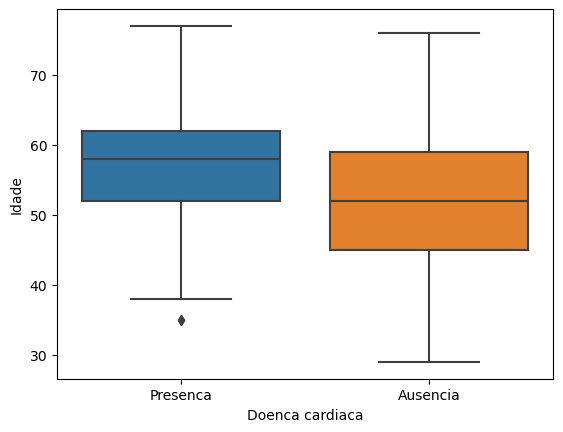

In [5]:
sns.boxplot(data=dados, x='Doenca cardiaca', y='Idade')

### Sexo x Doença cardíaca

No gráfico abaixo, é notável que a presença da doença cardíaca é menor nas mulheres, enquanto é muito maior nos homens, superando o número de ausência da doença.

<Axes: xlabel='Sexo', ylabel='count'>

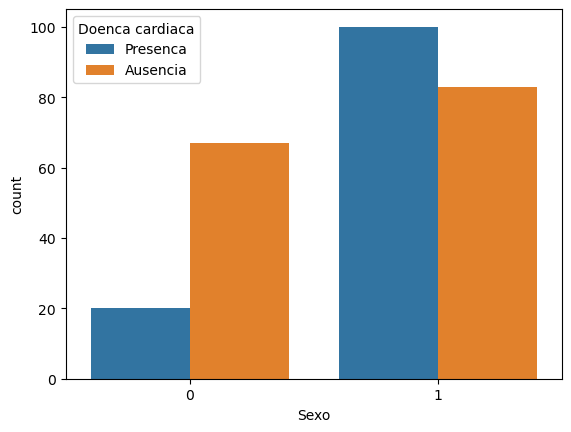

In [6]:
sns.countplot(data=dados, x='Sexo', hue='Doenca cardiaca')

### Tipo de dor x Doença cardíaca

Aqui, notamos que quanto maior o tipo de dor, mais relacionado está com a presença da doença.

<Axes: xlabel='Tipo dor', ylabel='count'>

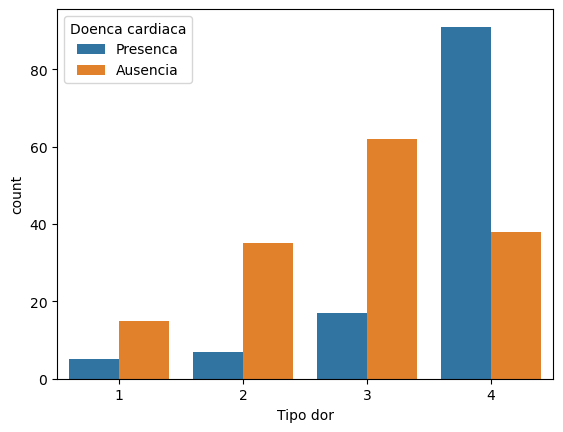

In [7]:
sns.countplot(data=dados, x='Tipo dor', hue='Doenca cardiaca')

Analisamos os valores dos targets e podemos notar que os valores estão razoavelmente balanceados. Ainda, realizamos a substituição dos valores para números 0 e 1.

In [8]:
dados['Doenca cardiaca'].value_counts(normalize=True) * 100

Doenca cardiaca
Ausencia    55.555556
Presenca    44.444444
Name: proportion, dtype: float64

In [9]:
dados['Doenca cardiaca'] = dados['Doenca cardiaca'].map({'Presenca': 1, 'Ausencia': 0})
dados

,Idade,Sexo,Tipo dor,Pressao arterial,Colesterol,Glicemia jejum >120,Resultados ECG,Frequencia cardiaca max,Dor exercicio,Depressao ST,Inclinacao ST,Numero vasos fluro,Teste cintilografia,Doenca cardiaca
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
